# Chapter 6

# Linear Model Selection and Regularization

Some ways in which linear model can be improved by replacing least squares fitting with some alternative fitting procedures. These alternative procedures will improve the prediction accuracy and model interpretibility.

__1. Prediction Accuracy__ :- Least square method is supposed to have low bias if the true model is linear and also if data is big enough it will have low variance as well. But if:

    (i). p > n, no least square solution exist.
    (ii). if n is not much larger than p, estimates will have higher variability and the model might overfit.
   By constraining ot shrinkage, we can reduce the variance with some negligible increase in bias.

__2. Model Interpretibility__ :- By setting irrelevant variables to zero, we can increase interpretibility of the model. Least square is unlikely to do that.


## 3 methods of model selection and regularization :-
__1. Best Subset Selection__:- Identifying a subset of p predictors that we believe related to response.

__2. Shrinkage__:- Fitting a model with all variables but they are shrunken towards zero relative to least squares. Shrinkage can also perform variable selection.

__3. Dimension Reduction__:- Projecting p predictors into M dimensional subspace, where M < p. This is done by taking M linear combination of the p variables.

## Subset Selection :-
Methods of selecting subset of predictors.

### 1. Best Subset Selection :-
Fit a seperate regression model for each combination of p predictors. Several stages of Best subset selection.
1. Start with $M_o$ i.e. a null model.
2. For k = 1,2,...p, Fit all $p \choose k$ models and pick the best among them and call them $M_0$ based on RSS or $R^2$.
3. Select a single best model from $M_0, M_1,......,M_p$ using cross validated prediction error, $C_p$, AIC, BIC or adjusted $R^2$.

Step 2 is reducing the problem from one of $2^p$ to one of (p+1) possible models. But as p increases, RSS decreases and $R^2$ increase so we will end up selecting model with maximum variable. We need to check performance of test data and hence come step 3.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import random
import itertools

In [34]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Credit.csv"
Credit = pd.read_csv(url, index_col = 0)
variables = Credit.columns
variables = variables.drop("Balance")

In [59]:
results = []
for k in range(len(variables)):
    for subset in itertools.combinations(variables,k+1):
        all_columns = "+".join(list(subset))
        my_formula = "Balance~" + all_columns
        model = ols(formula = my_formula, data = Credit).fit()
        results.append({"RSS":model.mse_resid, "R_squared": model.rsquared,"Variable_count": k+1})
    print("Done for : ",k)
RSS_and_r2 = pd.DataFrame(results)
Min_RSS = RSS_and_r2.groupby(["Variable_count"])['RSS'].min().reset_index()
Max_R2 = RSS_and_r2.groupby(["Variable_count"])['R_squared'].max().reset_index()

Done for :  0
Done for :  1
Done for :  2
Done for :  3
Done for :  4
Done for :  5
Done for :  6
Done for :  7
Done for :  8
Done for :  9


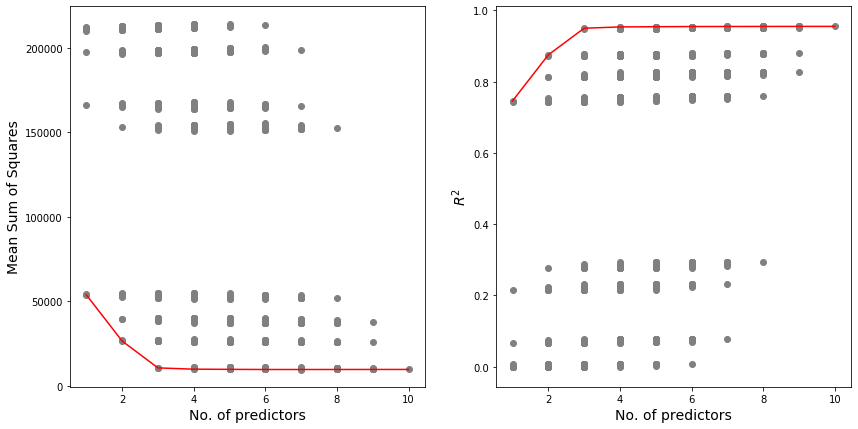

In [79]:
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(RSS_and_r2["Variable_count"], RSS_and_r2["RSS"], color = "grey")
ax1.plot(Min_RSS["Variable_count"], Min_RSS["RSS"], color = "r")
ax1.set_xlabel("No. of predictors", fontsize = 14)
ax1.set_ylabel("Mean Sum of Squares", fontsize = 14)
ax2 = fig.add_subplot(122)
ax2.scatter(RSS_and_r2["Variable_count"], RSS_and_r2["R_squared"], color = "grey")
ax2.plot(Max_R2["Variable_count"], Max_R2["R_squared"], color = "r")
ax2.set_xlabel("No. of predictors", fontsize = 14)
ax2.set_ylabel("$R^2$", fontsize = 14)
plt.show()

Above plot shows that, after adding 3 variables, there is little improvement in RSS and $R^2$ with each additional variable. So the subset of 3 variable with combination that gives minimum error can be used for model building.

For classification, instead of RSS or $R^2$, we can use deviance.

__Deviance__:- Negetive two times the maximized log-likelihood; smaller the deviance, better the fit. Deviance can be used for a broader class of models. 

__Drawbacks of Best Subset Selection__ :-
1. The drawback is that it can be computationally expensive if p is large.
2. When p is large, we have a big search space and hence more chances of selecting a model that is good at training but not on testing.